# CCT College

###### Module Title(s):	
Machine Learning for AI
###### Lecturer Name(s):	
David McQuaid
###### Assessment Title:	
ML_CA1
###### Student Name: 
Tamiris Rodrigues Duarte
###### Student Number:
2020294
###### Due Date (Deadline):	
22th April 2024

###### GitHub:	
https://github.com/tamirisrd/ML_CA1

#### Scenario:
This is a data set which contains over 65K attempts to access a firewall. There is a single categorical feature “Action”, that contains 4 categories – “allow, deny, drop, reset-both”.
Your task is to create a classification model that will predict the class of incoming traffic to the firewall. 

Perform an initial analysis of the data (EDA) using python in your Jupyter notebook. Discuss your findings and what relevance they might have on your planned classification algorithms. [0-20]

Perform any preparation of the data, that you feel is necessary, using python in your Jupyter notebook. Explain your rationale behind your data preparation and how it will assist you.[0-30]

Create and implement at least 2 classification algorithms that will output a classification based on the Action: (class attribute) feature. Test these models and try to improve it as you see fit. Discuss your findings and final rational for choosing a particular classification algorithm.[0-40]

Make a classification using your test data, using your final classification algorithm and comment on the accuracy differential between the training and testing set.[0-10]

In [1]:
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
import sklearn.preprocessing as preproc
from sklearn.impute import SimpleImputer
#from pandas.plotting import scatter_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_digits

In [2]:
# read file
df = pd.read_csv("log2.csv")
df.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Action
0,57222,53,54587,53,177,94,83,2,30,1,1,allow
1,56258,3389,56258,3389,4768,1600,3168,19,17,10,9,allow
2,6881,50321,43265,50321,238,118,120,2,1199,1,1,allow
3,50553,3389,50553,3389,3327,1438,1889,15,17,8,7,allow
4,50002,443,45848,443,25358,6778,18580,31,16,13,18,allow


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           65532 non-null  int64 
 1   Destination Port      65532 non-null  int64 
 2   NAT Source Port       65532 non-null  int64 
 3   NAT Destination Port  65532 non-null  int64 
 4   Bytes                 65532 non-null  int64 
 5   Bytes Sent            65532 non-null  int64 
 6   Bytes Received        65532 non-null  int64 
 7   Packets               65532 non-null  int64 
 8   Elapsed Time (sec)    65532 non-null  int64 
 9   pkts_sent             65532 non-null  int64 
 10  pkts_received         65532 non-null  int64 
 11  Action                65532 non-null  object
dtypes: int64(11), object(1)
memory usage: 6.0+ MB


In [4]:
# Check missing values
missing_values = df.isnull().sum()
print(missing_values)

Source Port             0
Destination Port        0
NAT Source Port         0
NAT Destination Port    0
Bytes                   0
Bytes Sent              0
Bytes Received          0
Packets                 0
Elapsed Time (sec)      0
pkts_sent               0
pkts_received           0
Action                  0
dtype: int64


In [5]:
df.describe()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,65532.000000,65532.000000,65532.000000,65532.000000,6.553200e+04,6.553200e+04,6.553200e+04,6.553200e+04,65532.000000,65532.000000,65532.000000
mean,49391.969343,10577.385812,19282.972761,2671.049930,9.712395e+04,2.238580e+04,7.473815e+04,1.028660e+02,65.833577,41.399530,61.466505
std,15255.712537,18466.027039,21970.689669,9739.162278,5.618439e+06,3.828139e+06,2.463208e+06,5.133002e+03,302.461762,3218.871288,2223.332271
min,0.000000,0.000000,0.000000,0.000000,6.000000e+01,6.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
25%,49183.000000,80.000000,0.000000,0.000000,6.600000e+01,6.600000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
50%,53776.500000,445.000000,8820.500000,53.000000,1.680000e+02,9.000000e+01,7.900000e+01,2.000000e+00,15.000000,1.000000,1.000000
75%,58638.000000,15000.000000,38366.250000,443.000000,7.522500e+02,2.100000e+02,4.490000e+02,6.000000e+00,30.000000,3.000000,2.000000
max,65534.000000,65535.000000,65535.000000,65535.000000,1.269359e+09,9.484772e+08,3.208818e+08,1.036116e+06,10824.000000,747520.000000,327208.000000


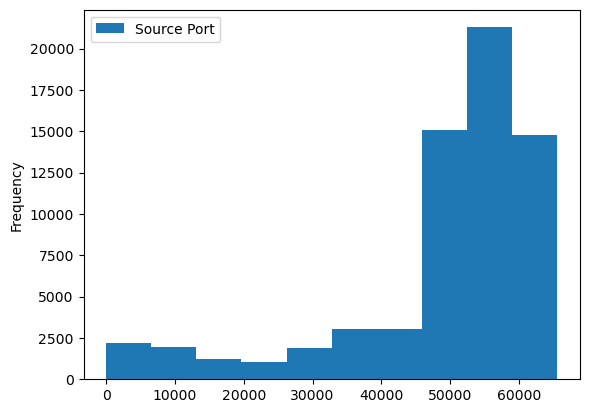

In [6]:
df.plot(x='Action', y='Source Port', kind = 'hist')
plt.show()

In [7]:
#sns.catplot(data=df, x="Action", y="Destination Port", hue="Source Port", kind="swarm")

In [8]:
# Create the new dataset with "Source Port", "Destination Port", and one-hot encoded "Action" columns
logs = df[['Source Port', 'Destination Port', 'Action']]
logs.head()

,Source Port,Destination Port,Action
0,57222,53,allow
1,56258,3389,allow
2,6881,50321,allow
3,50553,3389,allow
4,50002,443,allow


In [9]:
# Categorical columns 

cat_col_df = ['Source Port', 'Destination Port', 'Action']

impute_cat = SimpleImputer (strategy='most_frequent')
onehot_cat = OneHotEncoder(handle_unknown='ignore')
cat_transformer = Pipeline(steps=[('impute', impute_cat),('onehot',onehot_cat)])


In [10]:
# Numerical columns

num_col = logs.select_dtypes(include=[np.float64,np.int64]).columns

scaler_num = StandardScaler()

num_col_trans = Pipeline(steps=[('scale', scaler_num)])

print(num_col)


Index(['Source Port', 'Destination Port'], dtype='object')


In [11]:
cat_col_prepro = ColumnTransformer (transformers = [('cat', cat_transformer,
                                                    cat_col_df)],
                                   remainder="passthrough")
all_col_prepro = ColumnTransformer(transformers =[('cat', cat_transformer, cat_col_df),
                                                          ('num', num_col_trans, num_col)],
                                             remainder="passthrough")

df_temp = cat_col_prepro.fit_transform(logs)
print("Data temp after transforming: " )
print(df_temp)
df_temp_2 = all_col_prepro.fit_transform(logs) 
print("Data temp 2 after transforming: " )
print(df_temp_2)

Data temp after transforming: 
  (0, 15780)	1.0
  (0, 22734)	1.0
  (0, 25997)	1.0
  (1, 14847)	1.0
  (1, 22907)	1.0
  (1, 25997)	1.0
  (2, 636)	1.0
  (2, 25301)	1.0
  (2, 25997)	1.0
  (3, 9697)	1.0
  (3, 22907)	1.0
  (3, 25997)	1.0
  (4, 9166)	1.0
  (4, 22750)	1.0
  (4, 25997)	1.0
  (5, 10523)	1.0
  (5, 22750)	1.0
  (5, 25997)	1.0
  (6, 18575)	1.0
  (6, 25120)	1.0
  (6, 25997)	1.0
  (7, 9211)	1.0
  (7, 22750)	1.0
  (7, 25997)	1.0
  (8, 11274)	1.0
  :	:
  (65523, 25998)	1.0
  (65524, 12688)	1.0
  (65524, 24528)	1.0
  (65524, 25998)	1.0
  (65525, 22516)	1.0
  (65525, 22734)	1.0
  (65525, 25997)	1.0
  (65526, 10740)	1.0
  (65526, 24885)	1.0
  (65526, 25997)	1.0
  (65527, 21002)	1.0
  (65527, 22739)	1.0
  (65527, 25997)	1.0
  (65528, 10093)	1.0
  (65528, 22739)	1.0
  (65528, 25997)	1.0
  (65529, 13542)	1.0
  (65529, 22752)	1.0
  (65529, 25999)	1.0
  (65530, 13541)	1.0
  (65530, 22752)	1.0
  (65530, 25999)	1.0
  (65531, 13538)	1.0
  (65531, 22752)	1.0
  (65531, 25999)	1.0
Data temp 2 after 

In [13]:
# Label enconding

#features = []
#features = df.drop(['Action'], axis = 1)

#label_action = pd.DataFrame(logs, columns = ['Action'])
label_encoder = LabelEncoder()
 

label = label_encoder.fit_transform(logs['Action'])
print(label)

[0 0 0 ... 2 2 2]


In [14]:
X = logs.drop(['Action'], axis=1)
y = label

In [15]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y , random_state=1)

###  K-Nearest Neighbors

In [16]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [17]:
y_pred = knn.predict(X_train)

C:\Users\tahro\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


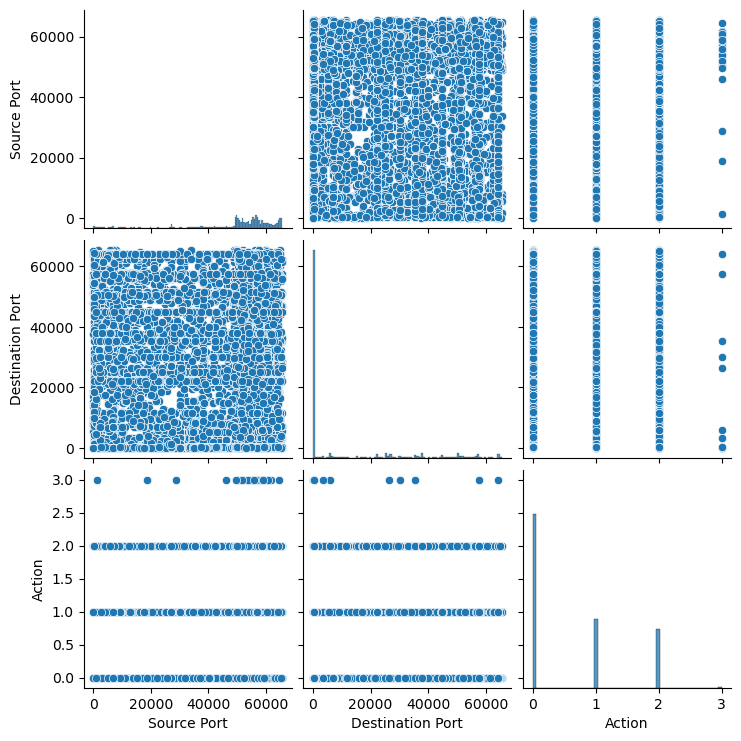

In [18]:
pairplot_data = pd.concat([X_train, pd.Series(y_train, name='Action')], axis=1)
sns.pairplot(pairplot_data)
plt.show()

In [49]:
# Evaluate KNN model
y_pred_knn_validation = knn.predict(X_validation)

accuracy_knn = accuracy_score(y_validation, y_pred_knn_validation)

precision_knn = precision_score(y_validation, y_pred_knn_validation, average='weighted')

recall_knn = recall_score(y_validation, y_pred_knn_validation, average='weighted')

f1_score_knn = f1_score(y_validation, y_pred_knn_validation, average='weighted')

conf_matrix_knn = confusion_matrix(y_validation, y_pred_knn_validation)

C:\Users\tahro\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [53]:
# KNN evaluation metrics

print("KNN Model Evaluation:")
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1 Score:", f1_score_knn)
print("Confusion Matrix:")
print(conf_matrix_knn)

KNN Model Evaluation:
Accuracy: 0.885307941158518
Precision: 0.8856927672029167
Recall: 0.885307941158518
F1 Score: 0.8853529906564064
Confusion Matrix:
[[8316  342  666    0]
 [ 350 3441    8    0]
 [ 498    2 2747    0]
 [   5    8    0    0]]


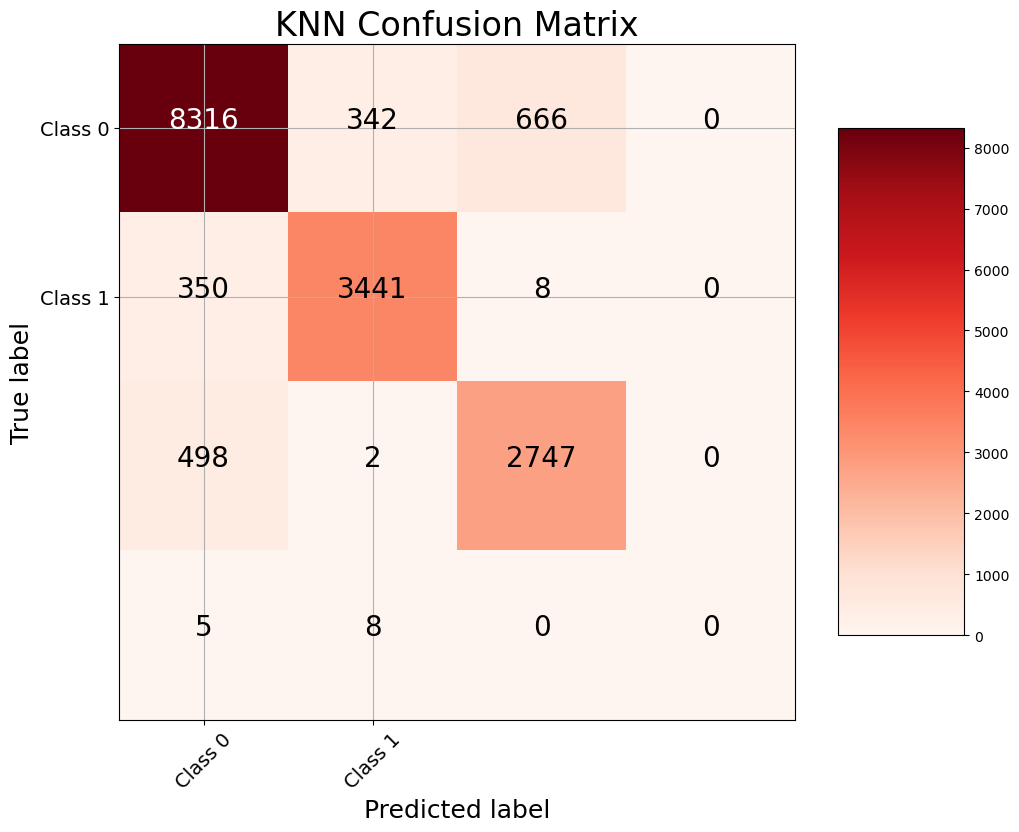

In [65]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size=24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size=14)
    plt.yticks(tick_marks, classes, size=14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize=20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size=18)
    plt.xlabel('Predicted label', size=18)

# Plot KNN confusion matrix 
plot_confusion_matrix(conf_matrix_knn, classes=['Class 0', 'Class 1'], title='KNN Confusion Matrix')
plt.show()

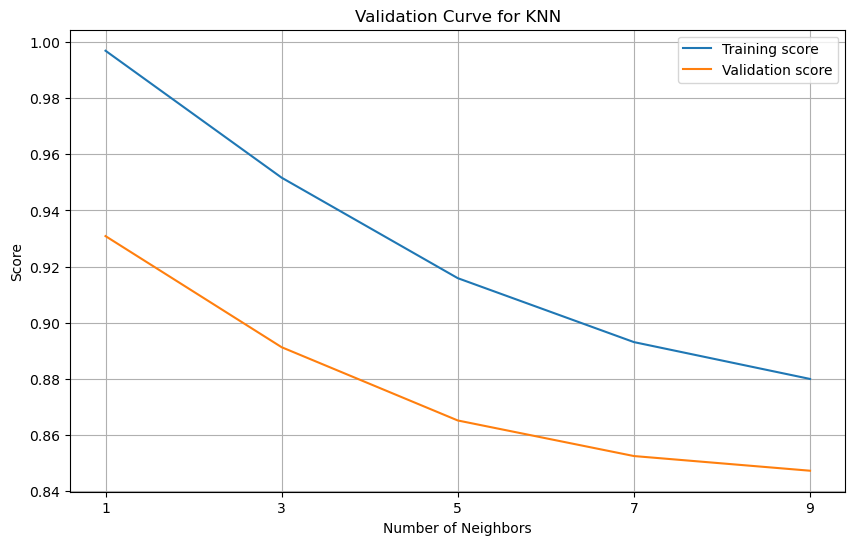

In [68]:
# Validation Curve KNN

# Define the range of values for the hyperparameter
param_range = [1, 3, 5, 7, 9]

# Compute training and validation scores for different values of n_neighbors
train_scores, test_scores = validation_curve(
    KNeighborsClassifier(metric='euclidean'), X_train, y_train,
    param_name="n_neighbors", param_range=param_range, cv=5
)

plt.figure(figsize=(10, 6))
plt.plot(param_range, np.mean(train_scores, axis=1), label="Training score")
plt.plot(param_range, np.mean(test_scores, axis=1), label="Validation score")
plt.title("Validation Curve for KNN")
plt.xlabel("Number of Neighbors")
plt.ylabel("Score")
plt.xticks(param_range)
plt.legend()
plt.grid(True)
plt.show()

### Random Forest

In [43]:
rfc_model = RandomForestClassifier (n_estimators=100, random_state = 42)

In [44]:
rfc_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [45]:
y_pred_rf = rfc_model.predict(X_train)

C:\Users\tahro\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


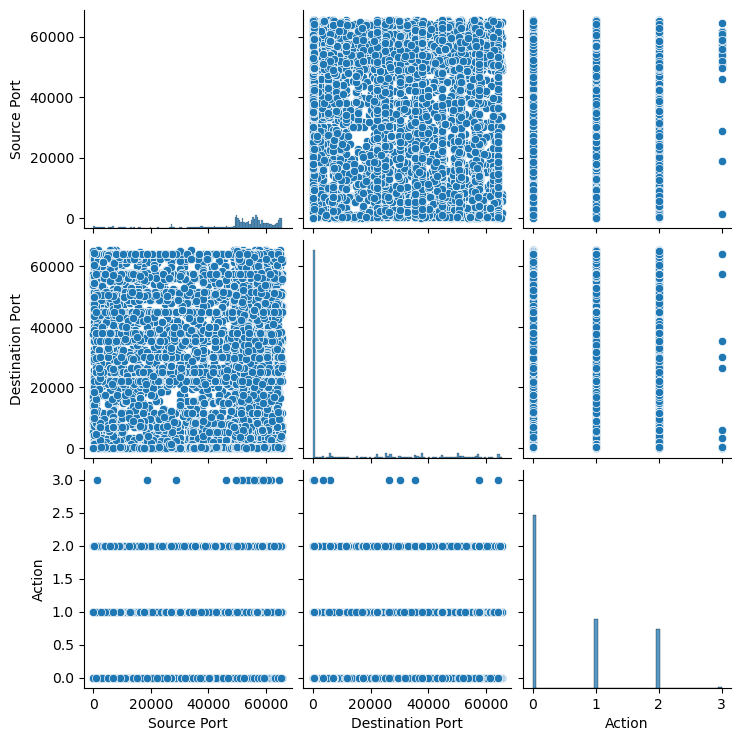

In [46]:
pairplot_data_rf = pd.concat([X_train, pd.Series(y_pred_rf, name='Action')], axis=1)
sns.pairplot(pairplot_data_rf)
plt.show()

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [51]:
# Evaluate Random Forest model
y_pred_rf_validation = rfc_model.predict(X_validation)

accuracy_rf = accuracy_score(y_validation, y_pred_rf_validation)

precision_rf = precision_score(y_validation, y_pred_rf_validation, average='weighted')

recall_rf = recall_score(y_validation, y_pred_rf_validation, average='weighted')

f1_score_rf = f1_score(y_validation, y_pred_rf_validation, average='weighted')

conf_matrix_rf = confusion_matrix(y_validation, y_pred_rf_validation)

C:\Users\tahro\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [54]:
# RF evaluation metrics

print("\nRandom Forest Model Evaluation:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_score_rf)
print("Confusion Matrix:")
print(conf_matrix_rf)


Random Forest Model Evaluation:
Accuracy: 0.9843130073857047
Precision: 0.9836542712441187
Recall: 0.9843130073857047
F1 Score: 0.9839626071619574
Confusion Matrix:
[[9182  142    0    0]
 [  85 3706    8    0]
 [   0    9 3238    0]
 [   5    8    0    0]]


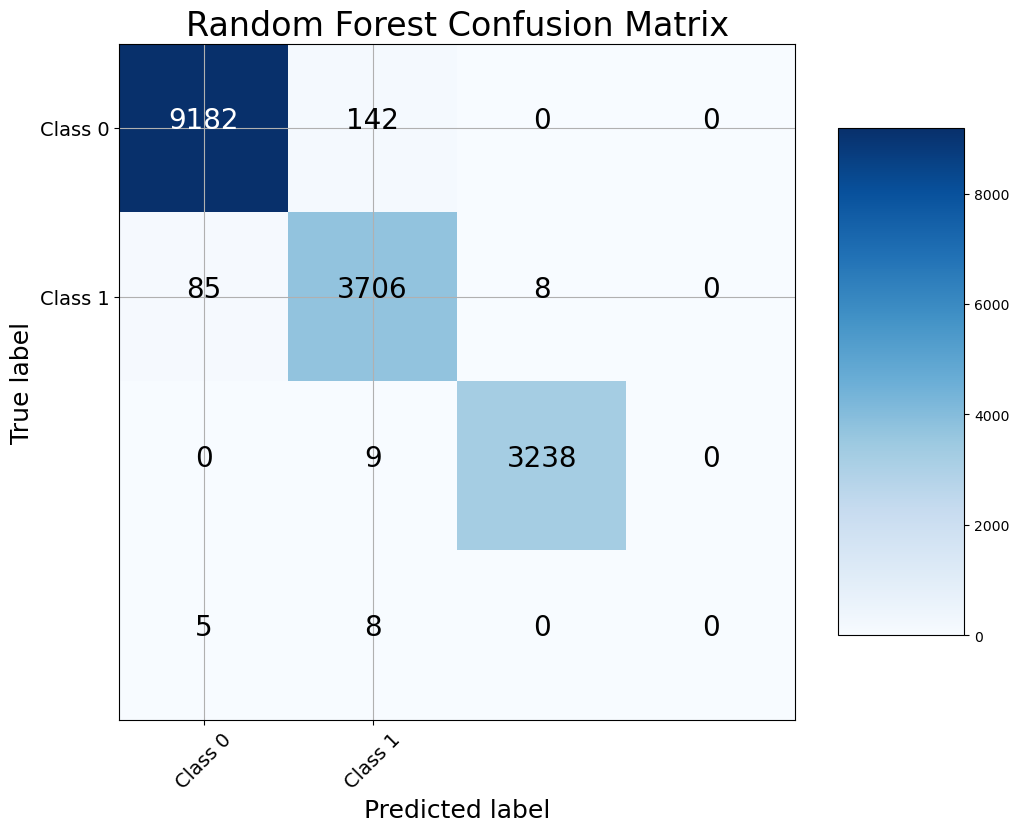

In [63]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size=24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size=14)
    plt.yticks(tick_marks, classes, size=14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize=20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size=18)
    plt.xlabel('Predicted label', size=18)

# Plot RF confusion matrix using
plot_confusion_matrix(conf_matrix_rf, classes=['Class 0', 'Class 1'], title='Random Forest Confusion Matrix')
plt.show()

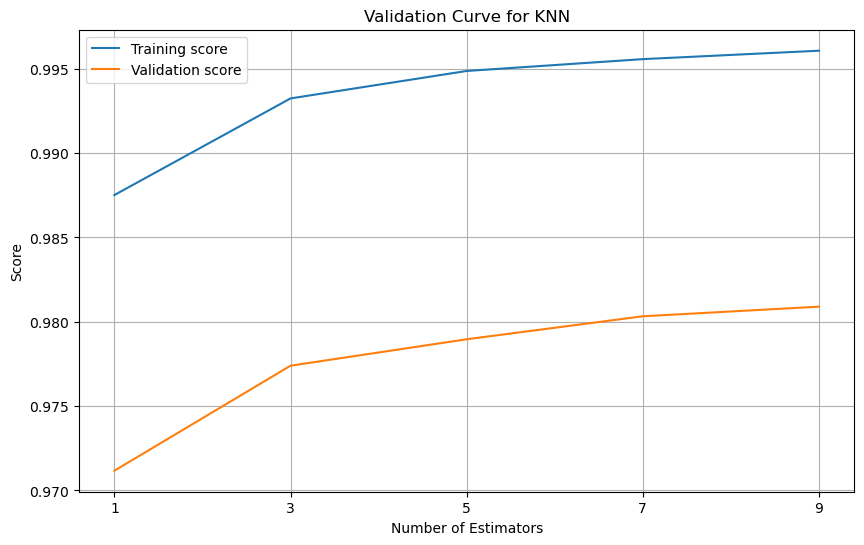

In [69]:
# Validation Curve RF

# Define the range of values for hyperparameter
param_range = [1, 3, 5, 7, 9]

# Compute training and validation scores for different values of n_neighbors
train_scores, test_scores = validation_curve(
    RandomForestClassifier(), X_train, y_train,
    param_name="n_estimators", param_range=param_range, cv=5
)

plt.figure(figsize=(10, 6))
plt.plot(param_range, np.mean(train_scores, axis=1), label="Training score")
plt.plot(param_range, np.mean(test_scores, axis=1), label="Validation score")
plt.title("Validation Curve for KNN")
plt.xlabel("Number of Estimators")
plt.ylabel("Score")
plt.xticks(param_range)
plt.legend()
plt.grid(True)
plt.show()

### References

In addition to classroom materials

(No date) scikit. Available at: https://scikit-learn.org/stable/index.html (Accessed: 22 April 2024). 

Clarke, M. (2021) How to use category encoders to encode categorical variables, Practical Data Science. Available at: https://practicaldatascience.co.uk/machine-learning/how-to-encode-categorical-variables-for-machine-learning (Accessed: April 2024). 

Evaluation metrics in machine learning (2023) GeeksforGeeks. Available at: https://www.geeksforgeeks.org/metrics-for-machine-learning-model/ (Accessed: April 2024). 

Madhavan, S. (2019a) Build and Test your First Machine Learning Movel Using Python and Scikit Learn, IBM developer. Available at: https://developer.ibm.com/tutorials/build-and-test-your-first-machine-learning-model-using-python-and-scikit-learn/ (Accessed: April 2024). 

Madhavan, S. (2019b) Learn classification algorithms using Python and scikit-learn, IBM developer. Available at: https://developer.ibm.com/tutorials/learn-classification-algorithms-using-python-and-scikit-learn/ (Accessed: April 2024). 

Parker, J.W.S. (2023) What is the role of firewall logs in security analysis?, James Parker. Available at: https://www.jamesparker.dev/what-is-the-role-of-firewall-logs-in-security-analysis/ (Accessed: April 2024). 

Plotting validation curves (no date) scikit. Available at: https://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html#sphx-glr-auto-examples-model-selection-plot-validation-curve-py (Accessed: April 2024). 